In [28]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Python/2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [75]:
def plot_geneder_pyramid(tissueNames,maleTotal,femaleTotal):
    # sort by total 
    """
    total = np.array(maleTotal)+np.array(femaleTotal)
    
    """
    sortIdx = np.argsort(tissueNames)
    #maleUsable = np.array(maleUsable)[sortIdx]
    #femaleUsable = np.array(femaleUsable)[sortIdx]
    maleTotal = np.array(maleTotal)[sortIdx]
    femaleTotal = np.array(femaleTotal)[sortIdx]
    tissueNames = np.array(tissueNames)[sortIdx]

    ind = 1 + np.arange(len(tissueNames))  # the x locations for the groups
    width = 0.9 # the width of the bars

    fig, axes = plt.subplots(ncols=2, sharey=True)
    for i in [0,1]:
        if i == 0:
            l1 = axes[i].barh(ind, maleTotal, width, align='center', color='#177AC1',edgecolor = "none")
            #l2 = axes[i].barh(ind, maleUsable, width, align='center', color='#72BBE0',edgecolor = "none")
            axes[i].set_title('Male',fontsize = 13)
        else:
            l3 =axes[i].barh(ind, femaleTotal, width, align='center', color='#900C3F',edgecolor = "none")
            #l4 = axes[i].barh(ind, femaleUsable, width, align='center', color='#ffbb99',edgecolor = "none")
            axes[i].set_title('Female',fontsize = 13)
        axes[i].axis([0, 300, 0, len(tissueNames)+1])
        axes[i].yaxis.grid() 
        axes[i].set_xlabel('sample counts',fontsize = 12)

    axes[0].set_yticks(ind)
    axes[0].set_yticklabels(tuple(tissueNames),fontsize = 10)
    axes[0].invert_xaxis()
    fig.set_size_inches(12, len(tissueNames)*0.2, forward=True)
    fig.subplots_adjust(wspace=0)
    # fig.show()
    # fig.legend((l1), ('male usable'), 'upper left',bbox_to_anchor=(0.26, 1.13, 1., .102),ncol=1,frameon=False)
    # fig.legend((l3), ('female usable'),'upper right',bbox_to_anchor=(-0.02, 1.13, 1., .102),ncol=1,frameon=False)
    # fig.legend((l1, l2), ('male unusable', 'male usable'), 'upper left',bbox_to_anchor=(0.26, 1.13, 1., .102),ncol=2,frameon=False)
    # fig.legend((l4, l3), ('female usable', 'female unusable'),'upper right',bbox_to_anchor=(-0.02, 1.13, 1., .102),ncol=2,frameon=False)

def plot_tissue_count_gener(mIDTotal,fIDTotal):
    sortIdx = np.argsort(mIDTotal)[::-1]
    mIDTotal = mIDTotal[sortIdx]
    # mIDUsable = mIDUsable[sortIdx]
    sortIdx = np.argsort(fIDTotal)[::-1]
    fIDTotal = fIDTotal[sortIdx]
    # fIDUsable = fIDUsable[sortIdx]

    sortIdx = np.argsort(fIDTotal)
    ind = 1 + np.arange(len(tissueNames))  # the x locations for the groups
    width = 1 # the width of the bars


    fig, axes = plt.subplots(ncols=2, sharey=True)
    for i in [0,1]:
        if i == 0:
            l1 = axes[i].bar(np.arange(len(mIDTotal)), mIDTotal, width, align='center', color='#177AC1',edgecolor = "none")
            # l2 = axes[i].bar(np.arange(len(mIDUsable)), mIDUsable, width, align='center', color='#72BBE0',edgecolor = "none")
            axes[i].set_title('Male',fontsize = 13)
        else:
            l3 = axes[i].bar(np.arange(len(fIDTotal)), fIDTotal, width, align='center', color='#900C3F',edgecolor = "none")
            #l4 = axes[i].bar(np.arange(len(fIDUsable)), fIDUsable, width, align='center', color='#ffbb99',edgecolor = "none")
            axes[i].set_title('Female',fontsize = 13)
        axes[i].axis([0, np.max([len(mIDTotal),len(fIDTotal)]), 0, 60])
        axes[i].yaxis.grid() 

    axes[0].set_xlabel('male donor ID',fontsize = 12)
    axes[1].set_xlabel('female donor ID',fontsize = 12)
    axes[0].set_ylabel('number of tissues/samples',fontsize = 12)
    axes[0].invert_xaxis()


    fig.set_size_inches(13, 5, forward=True)
    fig.subplots_adjust(wspace=0)
    #fig.legend((l1, l2), ('male unusable', 'male usable'), 'upper left',bbox_to_anchor=(0.1, 0.90, 1., .102),ncol=2,frameon=False)
    #fig.legend((l4, l3), ('female usable', 'female unusable'),'upper right',bbox_to_anchor=(-0.2, 0.90, 1., .102),ncol=2,frameon=False)






In [46]:
E = pd.read_csv('../data/mean_expression_matrix.txt', sep='\t', index_col=0)
E = E.transpose()
def logPlus1(x):
    return np.log(x+1)

def threshold(x, thresh):
    return 1 if x > thresh else 0

E_new = E.applymap(lambda x: threshold(x, 1))

maleL = []
femaleL = []
inputFilename = '../data/donorGenderAge.txt'
metaID = open(inputFilename,'r')
header = True
for line in metaID: 
    if header == True:
        header = False
        continue
    fields = line.split('\t')
    donor = fields[0].split('-')[1]
    if donor not in E_new.columns.tolist():
        print 'Missing donor:'+donor
        continue
    if int(fields[1]) == 1: # male
        maleL.append(donor)
    elif int(fields[1]) == 2: # female
        femaleL.append(donor)
    else:
        print 'ERROR in gender code'
metaID.close()

donorIDs_by_gender = maleL + femaleL
colors_by_gender = ['#177AC1'] * len(maleL) +  ['#900C3F'] * len(femaleL)
colors = sns.color_palette(colors_by_gender)
E_sorted_by_gender = E_new[donorIDs_by_gender]
# print(colors)


Missing donor:OHPJ
Missing donor:P44G
Missing donor:TMKS
Missing donor:11ILO
Missing donor:12WS9
Missing donor:14JIY
Missing donor:139UC
Missing donor:14PJN
Missing donor:14PJ3
Missing donor:14PJ5
Missing donor:14PHY
Missing donor:14PJP
Missing donor:14JG6
Missing donor:14PJ4
Missing donor:14JG1
Missing donor:14LLW
Missing donor:14LZ3
Missing donor:14PHW
Missing donor:14PHX
Missing donor:14PII
Missing donor:14PJ2
Missing donor:14PJM
Missing donor:14PJO
Missing donor:14PJ6
Missing donor:14PK6
Missing donor:562


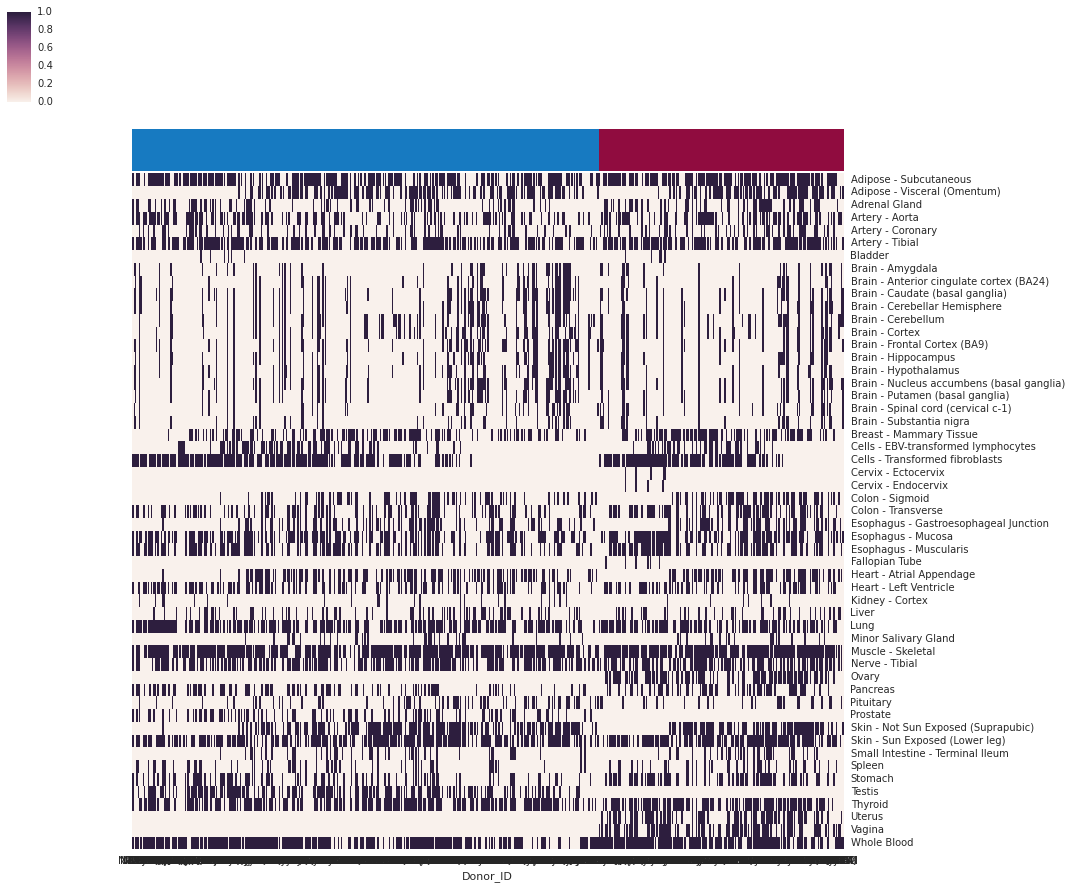

In [72]:
#f, (ax1, ax2) = plt.subplots(2)
cm = sns.clustermap(E_sorted_by_gender, row_cluster=False, col_cluster=False, col_colors=colors,figsize=(15, 15))
fig = plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
fig = plt.setp(cm.ax_heatmap.xaxis.get_majorticklabels(), rotation=0)

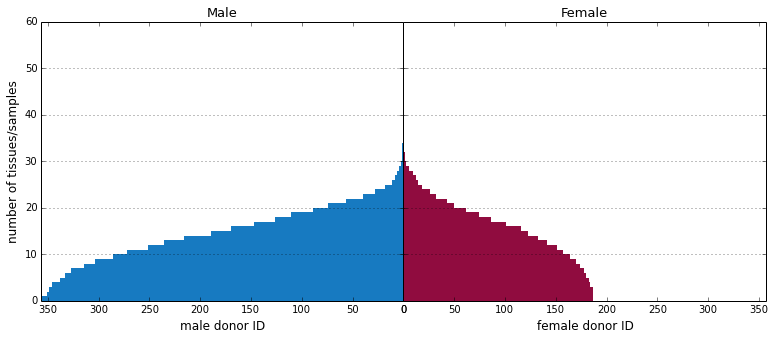

In [50]:
dtCount = {}
# get donor tissue count
inputFilename = '../data/donorTissues.txt'
metaID = open(inputFilename,'r')
for line in metaID:   
    fields = line.split('\t')
    dtCount[fields[0]] = int(fields[1])
fileID.close()  

maleL = []
femaleL = []
inputFilename = '../data/donorGenderAge.txt'
metaID = open(inputFilename,'r')
header = True
for line in metaID: 
    if header == True:
        header = False
        continue
    fields = line.split('\t')
    donor = fields[0].split('-')[1]
    if donor not in dtCount:
        continue
    if int(fields[1]) == 1: # male
        maleL.append(dtCount[donor])
    elif int(fields[1]) == 2: # female
        femaleL.append(dtCount[donor])
    else:
        print 'ERROR in gender code'
fileID.close()

# mIDTotal = np.array(range(100))
#fIDTotal = np.array(range(100))
# plot_tissue_count_gener(mIDTotal,fIDTotal)
plot_tissue_count_gener(np.array(maleL),np.array(femaleL))



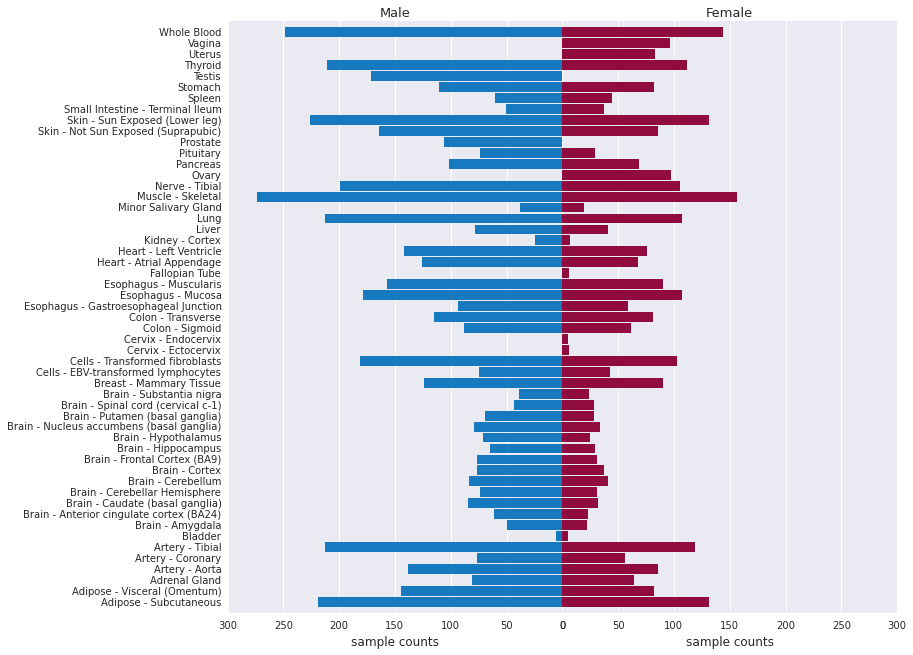

In [76]:
inputFilename = '../data/tissue_counts_male_female.txt'

fileID = open(inputFilename,'r')
header = True

tissueNames = []
maleUsable = []
femaleUsable = []
maleTotal = []
femaleTotal = []

for line in fileID:   
    if header == True:
        header = False
        continue
    fields = line.split('\t')
    tissueNames.append(fields[0])
    maleTotal.append(int(fields[2]))
    femaleTotal.append(int(fields[3]))
    """
    maleUsable.append(int(fields[1]))
    maleTotal.append(int(fields[1]) + int(fields[2]))
    femaleUsable.append(int(fields[3]))
    femaleTotal.append(int(fields[3]) + int(fields[4]))
    """
fileID.close()  

plot_geneder_pyramid(tissueNames,maleTotal,femaleTotal)
